## U shape PHP dynamics with multiple liquid slugs - with heat transfer

## $\frac{\partial \theta }{\partial \mathcal{T}} = \nabla^2 \theta$

In [1]:
@time using Plots
pyplot()

 14.036440 seconds (19.47 M allocations: 1.000 GiB, 3.51% gc time)


Plots.PyPlotBackend()

In [2]:
@time using DifferentialEquations

 38.900297 seconds (61.50 M allocations: 3.412 GiB, 3.27% gc time)


In [3]:
cd(dirname(pwd()))
cd("src") 


include("Systems.jl")
using ..Systems

include("Tools.jl")
using ..Tools


include("Thermomodel.jl")
using ..Thermomodel

include("Postprocessing.jl")
using ..Postprocessing

include("Boiling.jl")
using ..Boiling

cd(dirname(pwd()))
cd("src") 

## Parameters of the PHP

In [153]:
    ω0 = [sqrt(1.2e004)];
    ℘ = [1.2e005];

    θinitial=1.0
    θ  = 0.15;
    θe = 1 + θ;
    θc = 1 - θ;

    We = [600.0,600.0]
    
    He  = 3000.0; # H for wall and vapor
    Hc  = 3000.0; # depreciated
    Hwc = 3000.0; # H for wall and condenser liquid
    Hₗ   =  3000.0; # liquid wall heat transfer coeffcient

    
    X0 = 0.5;

    γ = 1.4;

In [154]:
    
    d = 1/30 # dimensionless diameter
    L = 4.0  # total length of the pipe when streched to a 1D pipe
    L2D = 2.0 # the actual length of the bended pipe in the real world
    angle = pi/2 # inclination angle 


1.5707963267948966

## Pipe definition

In [155]:
tube = Tube(d,L,L2D,angle)

Tube(0.03333333333333333, 4.0, 2.0, 1.5707963267948966)

## Evaporator and condenser definition

In [156]:
Xe = map(tuple, [0.0], [2.0])
evap = Evaporator(He,θe,Xe,We)

Evaporator(3000.0, 1.15, Tuple{Float64,Float64}[(0.0, 2.0)], [600.0, 600.0])

In [157]:
Xc = map(tuple, [2.0], [4.0])
cond = Condenser(Hc,θc,Xc,Hwc)

Condenser(3000.0, 0.85, Tuple{Float64,Float64}[(2.0, 4.0)], 3000.0)

## Vapor plug and liquid slug initialization

In [158]:
N=500
X0 = [(0.5,2.5)]
dXdt0 = [(0.0,0.0)]
ρₗ = 1000
Xarrays,θarrays = constructXarrays(X0,N,θinitial,L)
liquids=Liquid(γ,Hₗ,ρₗ,ω0,℘,X0,dXdt0,Xarrays,θarrays)

Liquid(1.4, 3000.0, 1000.0, [109.54451150103323], [120000.0], Tuple{Float64,Float64}[(0.5, 2.5)], Tuple{Float64,Float64}[(0.0, 0.0)], Array{Float64,1}[[0.5, 0.5080321285140562, 0.5160642570281124, 0.5240963855421686, 0.5321285140562249, 0.5401606425702812, 0.5481927710843374, 0.5562248995983936, 0.5642570281124498, 0.572289156626506  …  2.427710843373494, 2.4357429718875503, 2.4437751004016066, 2.4518072289156625, 2.459839357429719, 2.467871485943775, 2.4759036144578315, 2.4839357429718874, 2.4919678714859437, 2.5]], Array{Float64,1}[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]])

In [159]:
P = [2.0,1.0];
δ = 0.05*P;
vapors=Vapor(γ,P,δ)

Vapor(1.4, [2.0, 1.0], [0.1, 0.05])

In [160]:
α = 1 # nondimensional thermal diffusivity = (αₐ d^2) / (νₗ height^2)
Xwallarray,θwallarray = constructXarrays(L,N,θinitial)

wall = Wall(α,Xwallarray,θwallarray)

Wall(1.0, [0.0, 0.008016032064128256, 0.01603206412825651, 0.02404809619238477, 0.03206412825651302, 0.04008016032064128, 0.04809619238476954, 0.056112224448897796, 0.06412825651302605, 0.07214428857715431  …  3.9278557114228456, 3.935871743486974, 3.943887775551102, 3.9519038076152304, 3.9599198396793587, 3.967935871743487, 3.975951903807615, 3.9839679358717435, 3.9919839679358717, 4.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

In [161]:
# struct Mapping
#     walltoliquid::Array{Tuple{Int64,Int64},1}
#     liquidtowall::Array{Array{Int64,1},1}
# end

In [162]:
walltoliquid, liquidtowall = constructmapping(Xarrays,Xwallarray)
mapping = Mapping(walltoliquid,liquidtowall)

Mapping(Tuple{Int64,Int64}[(1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1)  …  (2, -1), (2, -1), (2, -1), (2, -1), (2, -1), (2, -1), (2, -1), (2, -1), (2, -1), (2, -1)], Array{Int64,1}[[64, 65, 66, 67, 68, 69, 70, 71, 72, 73  …  304, 305, 306, 307, 308, 309, 310, 311, 312, 313]])

## Construct the system

In [163]:
sys0 = PHPSystem(tube,evap,cond,liquids,vapors,wall,mapping)

PHPSystem(Tube(0.03333333333333333, 4.0, 2.0, 1.5707963267948966), Evaporator(3000.0, 1.15, Tuple{Float64,Float64}[(0.0, 2.0)], [600.0, 600.0]), Condenser(3000.0, 0.85, Tuple{Float64,Float64}[(2.0, 4.0)], 3000.0), Liquid(1.4, 3000.0, 1000.0, [109.54451150103323], [120000.0], Tuple{Float64,Float64}[(0.5, 2.5)], Tuple{Float64,Float64}[(0.0, 0.0)], Array{Float64,1}[[0.5, 0.5080321285140562, 0.5160642570281124, 0.5240963855421686, 0.5321285140562249, 0.5401606425702812, 0.5481927710843374, 0.5562248995983936, 0.5642570281124498, 0.572289156626506  …  2.427710843373494, 2.4357429718875503, 2.4437751004016066, 2.4518072289156625, 2.459839357429719, 2.467871485943775, 2.4759036144578315, 2.4839357429718874, 2.4919678714859437, 2.5]], Array{Float64,1}[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]), Vapor(1.4, [2.0, 1.0], [0.1, 0.05]), Wall(1.0, [0.0, 0.008016032064128256, 0.01603206412825651, 0.02404809619238477, 0.03206412825651302, 0

In [164]:
typeof(sys0)

PHPSystem

## Construct U for wall heat function

## construct state vector U

In [165]:
vectoXMδ(XMδtovec(X0,dXdt0,M,δ))

(Tuple{Float64,Float64}[(0.5, 2.5)], Tuple{Float64,Float64}[(0.0, 0.0)], [0.820335356007638, 1.5], [0.1, 0.05])

In [166]:
# sys0.wall.θarray = settemperature!.(sys0.wall.θarray,sys0.wall.Xarray,[sys0]);

In [167]:
Lvaporplug = XptoLvaporplug(X0,sys0.tube.L)
M = P.^(1/γ).* Lvaporplug


u=[XMδtovec(X0,dXdt0,M,δ); wallθtovec(sys0.wall.θarray); liquidθtovec(sys0.liquid.θarrays)];

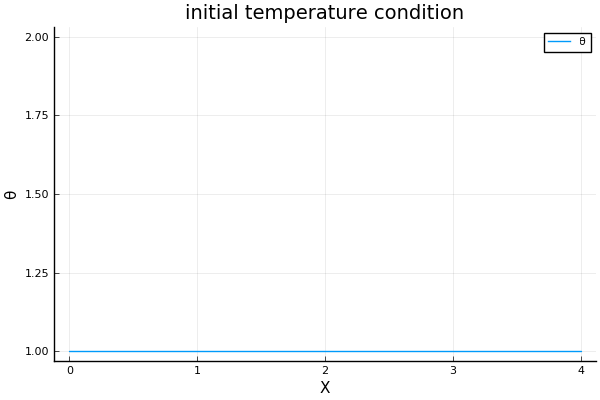

In [168]:
plot([sys0.wall.Xarray],[sys0.wall.θarray], title="initial temperature condition", labels = "θ", xlabel="X", ylabel="θ")

## Solve the constructed ODE for U

### propagation function

In [169]:
function dfdt(u,p,t)
    
        p = deepcopy(getcurrentsys(u,p))
    
        indexes = Int64[]
        θliquidtemp = Array[]

        for i = 1:length(u)
            if abs(u[i]+1e10) <= 10^(-1)
                push!(indexes,i)
            end
        end
    

    dynamicsdu = dynamicsmodel(u[1:indexes[1]-1],p)
    
    
    
    duwalltemp = wallmodel(u[indexes[1]+1:indexes[2]-1],p)
    walldu = duwallθtovec(duwalltemp)
    
    
    
    for i = 1:length(indexes)-2
    push!(θliquidtemp, u[indexes[i+1]+1:indexes[i+2]-1])
    end
    push!(θliquidtemp, u[indexes[end]+1:end])
    duliquidtemp = zero.(deepcopy(θliquidtemp))
    duliquidtemp = liquidmodel(θliquidtemp,p)
    liquiddu = duliquidθtovec(duliquidtemp)
    
    du = [dynamicsdu;walldu;liquiddu]

    return(du)

end

dfdt (generic function with 1 method)

### condition

In [170]:
# function condition(u,t,integrator)
#     return (integrator.t > 0.1)
# end

### affect! (with boundary conditions)

In [171]:
p

PHPSystem(Tube(0.03333333333333333, 4.0, 2.0, 1.5707963267948966), Evaporator(3000.0, 1.15, Tuple{Float64,Float64}[(0.0, 1.0)], [600.0, 600.0]), Condenser(3000.0, 0.85, Tuple{Float64,Float64}[(1.0, 3.0)], 3000.0), Liquid(1.4, 3000.0, 1000.0, [109.54451150103323], [120000.0], Tuple{Float64,Float64}[(0.5, 2.5)], Tuple{Float64,Float64}[(0.0, 0.0)], Array{Float64,1}[[0.5, 0.5080321285140562, 0.5160642570281124, 0.5240963855421686, 0.5321285140562249, 0.5401606425702812, 0.5481927710843374, 0.5562248995983936, 0.5642570281124498, 0.572289156626506  …  2.427710843373494, 2.4357429718875503, 2.4437751004016066, 2.4518072289156625, 2.459839357429719, 2.467871485943775, 2.4759036144578315, 2.4839357429718874, 2.4919678714859437, 2.5]], Array{Float64,1}[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]), Vapor(1.4, [2.0, 1.0], [0.1, 0.05]), Wall(1.0, [0.0, 0.008016032064128256, 0.01603206412825651, 0.02404809619238477, 0.03206412825651302, 0

In [172]:
function affect!(integrator)
    
    p = deepcopy(getcurrentsys(integrator.u,integrator.p))
    
    p = nucleateboiling(p,(1.2,1.4),1.0)
    
    Lvaporplug = XptoLvaporplug(p.liquid.Xp,p.tube.L)
    M = p.vapor.P.^(1/p.vapor.γ).* Lvaporplug
    
    unew=[XMδtovec(p.liquid.Xp,p.liquid.dXdt,M,p.vapor.δ); wallθtovec(p.wall.θarray); liquidθtovec(p.liquid.θarrays)];
        
#     set_u!(integrator,  unew)
    resize!(integrator.u,length(unew))
    integrator.u = deepcopy(unew)
    

end

affect! (generic function with 1 method)

In [173]:
cb =  PresetTimeCallback(0.1,affect!)

DiscreteCallback{DiffEqCallbacks.var"#61#64"{Float64},DiffEqCallbacks.var"#62#65"{typeof(affect!)},DiffEqCallbacks.var"#63#66"{typeof(DiffEqBase.INITIALIZE_DEFAULT),Bool,Float64,typeof(affect!)}}(DiffEqCallbacks.var"#61#64"{Float64}(0.1), DiffEqCallbacks.var"#62#65"{typeof(affect!)}(affect!), DiffEqCallbacks.var"#63#66"{typeof(DiffEqBase.INITIALIZE_DEFAULT),Bool,Float64,typeof(affect!)}(DiffEqBase.INITIALIZE_DEFAULT, true, 0.1, affect!), Bool[1, 1])

In [202]:
tstep=2e-5

p = sys0
tspan = (0.0, 1.0);
prob = ODEProblem(dfdt, u, tspan, p)

integrator = init(prob, RK4(), adaptive=false, dt=tstep);


sol = solve(prob, RK4(), adaptive=false, dt=tstep);
# sol = solve(prob, RK4(), adaptive=false,dt=tstep,callback=cb);

BoundsError: BoundsError: attempt to access 0-element Array{Int64,1} at index [0]

In [175]:
sol[end]

760-element Array{Float64,1}:
  0.996744473492533   
  2.9967444734925213  
  0.009066956020014177
  0.009066956020014177
  1.3338263189849662  
  1.3427451851842245  
  0.6134909629773191  
 -0.10725481481577902 
 -1.0e10              
  1.3207698838854443  
  1.3207698838854443  
  1.3207650443419268  
  1.3207553577816562  
  ⋮                   
  1.0136850146156955  
  1.0173525939762718  
  1.0210942905127707  
  1.024910817241325   
  1.0288028358863786  
  1.0327709510458172  
  1.03681570391325    
  1.0409375655267612  
  1.0451369295114088  
  1.0494141042805312  
  1.0537693046586052  
  1.0582026428858768  

In [176]:
constructmapping(Xarrays,Xwallarray)

(Tuple{Int64,Int64}[(1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1)  …  (2, -1), (2, -1), (2, -1), (2, -1), (2, -1), (2, -1), (2, -1), (2, -1), (2, -1), (2, -1)], Array{Int64,1}[[64, 65, 66, 67, 68, 69, 70, 71, 72, 73  …  304, 305, 306, 307, 308, 309, 310, 311, 312, 313]])

In [177]:
sysfinal = getcurrentsys.(sol.u,[sys0])

25001-element Array{PHPSystem,1}:
 PHPSystem(Tube(0.03333333333333333, 4.0, 2.0, 1.5707963267948966), Evaporator(3000.0, 1.15, Tuple{Float64,Float64}[(0.0, 2.0)], [600.0, 600.0]), Condenser(3000.0, 0.85, Tuple{Float64,Float64}[(2.0, 4.0)], 3000.0), Liquid(1.4, 3000.0, 1000.0, [109.54451150103323], [120000.0], Tuple{Float64,Float64}[(0.5, 2.5)], Tuple{Float64,Float64}[(0.0, 0.0)], Array{Float64,1}[[0.5, 0.5080321285140562, 0.5160642570281124, 0.5240963855421686, 0.5321285140562249, 0.5401606425702811, 0.5481927710843374, 0.5562248995983936, 0.5642570281124498, 0.572289156626506  …  2.427710843373494, 2.4357429718875503, 2.4437751004016066, 2.451807228915663, 2.459839357429719, 2.467871485943775, 2.4759036144578315, 2.483935742971888, 2.4919678714859437, 2.5]], Array{Float64,1}[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]), Vapor(1.4, [2.0, 1.0], [0.1, 0.05]), Wall(1.0, [0.0, 0.008016032064128256, 0.01603206412825651, 0.02404809

In [178]:
sysfinal[end].wall.θarray

500-element Array{Float64,1}:
 1.3207698838854443
 1.3207698838854443
 1.3207650443419268
 1.3207553577816562
 1.3207408092466206
 1.3207213762709333
 1.32069702884614  
 1.3206677293748794
 1.320633432612824 
 1.3205940855988114
 1.3205496275730617
 1.320499989883349 
 1.3204450958789857
 ⋮                 
 1.1220757044268448
 1.1221034528118363
 1.1221283057401972
 1.1221503015670218
 1.1221694742380774
 1.1221858533421958
 1.122199464156941 
 1.122210327687624 
 1.1222184606997208
 1.1222238757447496
 1.122226581179642 
 1.122226581179642 

In [179]:
result1=soltoMatrxResult(sol,sys0);

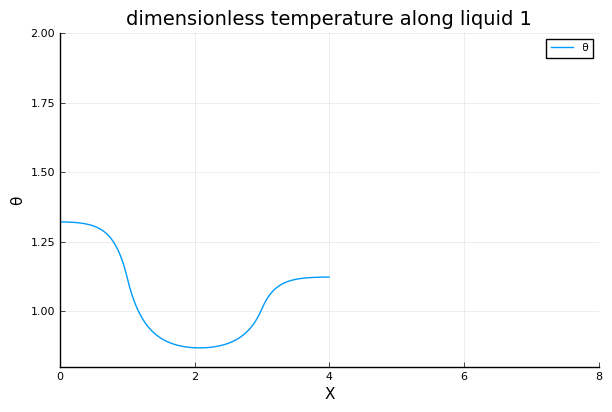

┌ Info: Saved animation to 
│   fn = C:\Users\liyux\Documents\GitHub\OneDThermalFlow\src\tmp.gif
└ @ Plots C:\Users\liyux\.juliapro\JuliaPro_v1.3.1-2\packages\Plots\ninUP\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\liyux\\Documents\\GitHub\\OneDThermalFlow\\src\\tmp.gif")
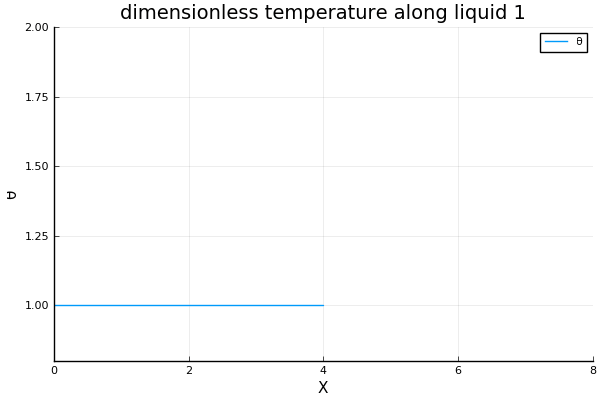

In [196]:
@gif for i=1:size(sol,2)
plot([sysfinal[i].wall.Xarray],[sysfinal[i].wall.θarray], labels = "θ", xlabel="X", ylabel="θ", title=("dimensionless temperature along liquid 1"),xlim=(0,8), ylim=(0.8,2.0))
    end every 200

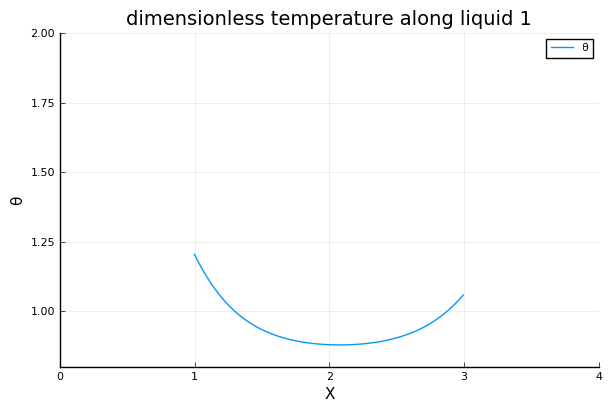

┌ Info: Saved animation to 
│   fn = C:\Users\liyux\Documents\GitHub\OneDThermalFlow\src\tmp.gif
└ @ Plots C:\Users\liyux\.juliapro\JuliaPro_v1.3.1-2\packages\Plots\ninUP\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\liyux\\Documents\\GitHub\\OneDThermalFlow\\src\\tmp.gif")
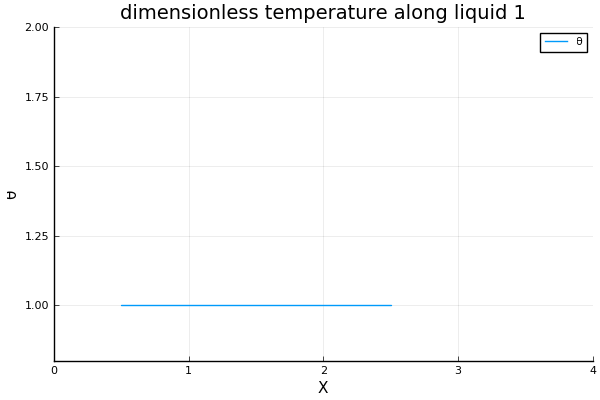

In [197]:
@gif for i=1:size(sol,2)
plot([sysfinal[i].liquid.Xarrays[1]],[sysfinal[i].liquid.θarrays[1]], labels = "θ", xlabel="X", ylabel="θ", title=("dimensionless temperature along liquid 1"),xlim=(0,4), ylim=(0.8,2.0))
# plot!([sysfinal[i].liquid.Xarrays[2]],[sysfinal[i].liquid.θarrays[2]], labels = "θ", xlabel="X", ylabel="θ", title=("dimensionless temperature along liquid 1"),xlim=(0,8), ylim=(0.8,1.2))
    end every 200

In [203]:
(sysfinal[end].vapor.P).^((γ-1)/γ)

2-element Array{Float64,1}:
 1.1235856359881307
 1.1236545564351135

In [182]:
# @gif for i=1:size(sol,2)
# plot([sysfinal[i].liquid.Xarrays[1]],[sysfinal[i].liquid.θarrays[1]], labels = "θ", xlabel="X", ylabel="θ", title=("dimensionless temperature along liquid 1"),xlim=(0,8), ylim=(0.9,1.1))
# plot!([sysfinal[i].liquid.Xarrays[2]],[sysfinal[i].liquid.θarrays[2]], labels = "θ", xlabel="X", ylabel="θ", title=("dimensionless temperature along liquid 1"),xlim=(0,8), ylim=(0.9,1.1))
#     if i >2502
#         plot!([sysfinal[i].liquid.Xarrays[3]],[sysfinal[i].liquid.θarrays[3]], labels = "θ", xlabel="X", ylabel="θ", title=("dimensionless temperature along liquid 1"),xlim=(0,8), ylim=(0.9,1.1))
#     end
#     end every 50

In [183]:
MatrxXp, MatrxdXdt, MatrxM, Matrxδ=soltoMatrxResult(sol,sys0);

ΔMatrxXp = zeros(size(MatrxXp,1)+1,size(MatrxXp,2))
ΔMatrxXp[1,:] = MatrxXp[1,:]
ΔMatrxXp[end,:] .= sys0.tube.L .- MatrxXp[end,:]
for i = 2:size(MatrxXp,1)
    ΔMatrxXp[i,:] = MatrxXp[i,:]-MatrxXp[i-1,:]
end

MatrxXp

2×25001 Array{Float64,2}:
 0.5  0.500101  0.500403  0.500905  0.501606  …  0.996744  0.996744  0.996744
 2.5  2.5001    2.5004    2.5009    2.50161      2.99674   2.99674   2.99674 

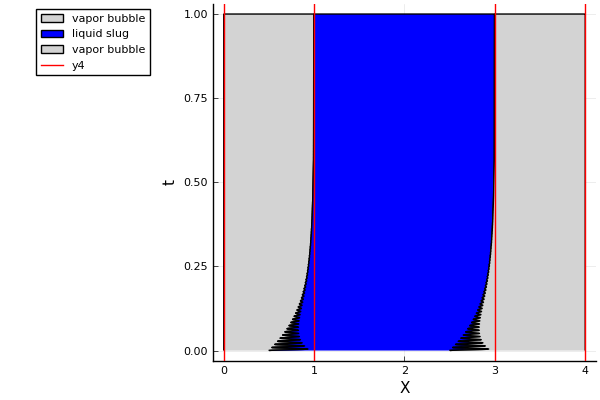

In [184]:
portfoliocomposition(ΔMatrxXp', sol.t, legend = :outertopleft, color = [:lightgrey :blue],ylabel="t", xlabel="X", labels = ["vapor bubble" "liquid slug"])

vline!([0,1,3,4], color = [:red])

In [185]:
# MatrxXp1, MatrxdXdt1, MatrxM1, Matrxδ1=soltoMatrxResult(sol[1:2502],sys0);

# ΔMatrxXp1 = zeros(size(MatrxXp1,1)+1,size(MatrxXp1,2))
# ΔMatrxXp1[1,:] = MatrxXp1[1,:]
# ΔMatrxXp1[end,:] .= sys0.tube.L .- MatrxXp1[end,:]
# for i = 2:size(MatrxXp1,1)
#     ΔMatrxXp1[i,:] = MatrxXp1[i,:]-MatrxXp1[i-1,:]
# end

# ΔMatrxXp1

In [186]:
# MatrxXp2, MatrxdXdt2, MatrxM2, Matrxδ2=soltoMatrxResult(sol[2503:end],sys0);

# ΔMatrxXp2 = zeros(size(MatrxXp2,1)+1,size(MatrxXp2,2))
# ΔMatrxXp2[1,:] = MatrxXp2[1,:]
# ΔMatrxXp2[end,:] .= sys0.tube.L .- MatrxXp2[end,:]
# for i = 2:size(MatrxXp2,1)
#     ΔMatrxXp2[i,:] = MatrxXp2[i,:]-MatrxXp2[i-1,:]
# end

# ΔMatrxXp2

In [187]:
# portfoliocomposition(ΔMatrxXp1', sol.t[1:2502], legend = :outertopleft, color = [:lightgrey :blue],ylabel="t", xlabel="X", labels = ["vapor bubble" "liquid slug"])
# portfoliocomposition!(ΔMatrxXp2',sol.t[2503:end], color = [:lightgrey :blue])
# vline!([0,1,3,5,7,8], color = [:red])

In [188]:
# portfoliocomposition(MatrxM', sol.t, legend = :outertopleft, labels = ("mass of vapor bubble"), ylabel="t", xlabel="mass")

In [189]:
# result1 = soltoResult(sol[1:11,:],sys0)
# plot(sol.t, result1.θ[1], title="temperatures for three vapor bubbles")
# plot!(sol.t, result1.θ[2])
# plot!(sol.t, result1.θ[3])

In [190]:
Xpvapornew = (1.5,1.6)
Pvapornew = 1.1

1.1

In [191]:
sysnew = nucleateboiling(sys0,Xpvapornew,Pvapornew)

PHPSystem(Tube(0.03333333333333333, 4.0, 2.0, 1.5707963267948966), Evaporator(3000.0, 1.15, Tuple{Float64,Float64}[(0.0, 2.0)], [600.0, 600.0]), Condenser(3000.0, 0.85, Tuple{Float64,Float64}[(2.0, 4.0)], 3000.0), Liquid(1.4, 3000.0, 1000.0, [109.54451150103323], [120000.0], Tuple{Float64,Float64}[(0.44999999999999996, 1.5), (1.6, 2.55)], Tuple{Float64,Float64}[(0.0, 0.0), (0.0, 0.0)], Array{Float64,1}[[0.44999999999999996, 0.45846774193548384, 0.46693548387096767, 0.47540322580645156, 0.48387096774193544, 0.49233870967741933, 0.5008064516129032, 0.5092741935483871, 0.5177419354838709, 0.5262096774193548  …  1.4237903225806452, 1.432258064516129, 1.440725806451613, 1.4491935483870968, 1.4576612903225805, 1.4661290322580645, 1.4745967741935486, 1.4830645161290323, 1.491532258064516, 1.5], [1.6, 1.6076612903225806, 1.6153225806451612, 1.6229838709677422, 1.6306451612903228, 1.6383064516129033, 1.645967741935484, 1.6536290322580647, 1.6612903225806455, 1.6689516129032258  …  2.48104838709

In [192]:
p.wall.Xarray

500-element Array{Float64,1}:
 0.0                 
 0.008016032064128256
 0.01603206412825651 
 0.02404809619238477 
 0.03206412825651302 
 0.04008016032064128 
 0.04809619238476954 
 0.056112224448897796
 0.06412825651302605 
 0.07214428857715431 
 0.08016032064128256 
 0.08817635270541083 
 0.09619238476953908 
 ⋮                   
 3.911823647294589   
 3.9198396793587174  
 3.9278557114228456  
 3.935871743486974   
 3.943887775551102   
 3.9519038076152304  
 3.9599198396793587  
 3.967935871743487   
 3.975951903807615   
 3.9839679358717435  
 3.9919839679358717  
 4.0                 

In [193]:
function getwallWe(Xarray,p::PHPSystem)

    Wearray = zero(deepcopy(Xarray))


    for i = 1:length(Xarray)
        for j = 1:length(p.evaporator.Xe)
            if ifamongone(Xarray[i],p.evaporator.Xe[j])
                Wearray[i] = p.evaporator.We[j]
            end
        end
    end

    return Wearray
end

getwallWe (generic function with 1 method)

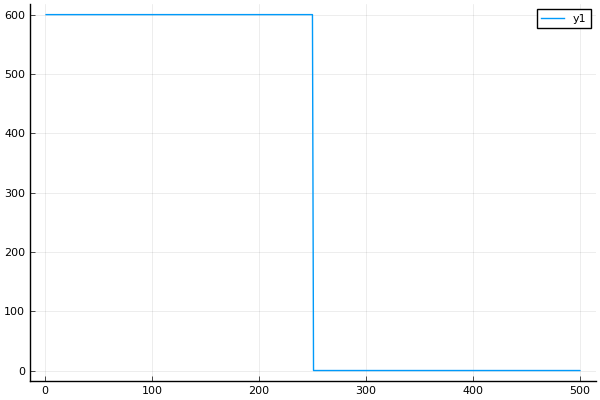

In [194]:
plot(getwallWe(p.wall.Xarray,sys0::PHPSystem))

In [195]:
sys0.mapping.walltoliquid[1001]

BoundsError: BoundsError: attempt to access 500-element Array{Tuple{Int64,Int64},1} at index [1001]